# The Binomial in Soccer field
*Auxiliar notebook for calculations*  
  
[Link to the blog post](https://vcuspinera.github.io/posts/2019/binomial_soccer)  

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import binom
import altair as alt

# Need to enable this to allow work with larger datasets (https://altair-viz.github.io/user_guide/faq.html)
alt.data_transformers.enable('json')

# enable next lines if you use Altair verion 4.x
alt.renderers.enable('mimetype'); # For Jupyter Lab (v2.x)
#alt.renderers.enable('default'); # For Jupyter Notebook

#enable next line if you use Altair version 3.x in Jupyter notebook
#alt.renderers.enable('notebook')

### Calculations

In [13]:
# Parameters
np.random.seed(1)
n = 5
k = 4
num_sim = 100_000
p_mexico = 0.73 # Mexico probability of score a goal
p_global = 0.85 # Global probability of score a goal

In [14]:
# Probability that MEXICO scores 4 out of 5 penalty kicks in a shootout
binom.pmf(k, n, p_mexico)

0.3833762534999999

In [15]:
# Probability that MEXICO scores 4 OR + penalties in a shootout
binom.sf(k-1, n, p_mexico)

0.5906834128

In [16]:
# Probability that AN AVERAGE TEAM scores 4 OR + penalties in a shootout
binom.sf(k-1, n, p_global)

0.83521

### Simulation

In [17]:
# simulations for plots
sim_mex = np.random.binomial(n, p_mexico, size=num_sim)
sim_glo = np.random.binomial(n, p_global, size=num_sim)
df = pd.DataFrame([sim_mex, sim_glo], index =['Mexico', 'Global']).T
simulation = df.melt(value_vars=['Mexico', 'Global'], var_name='Level', value_name='Goals')

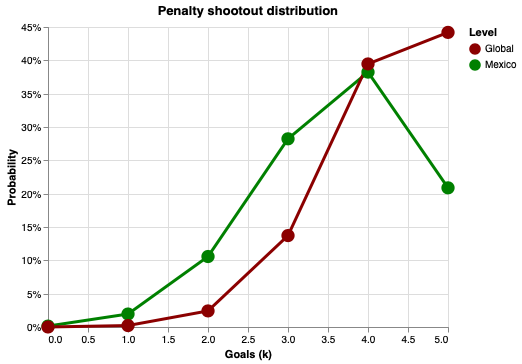

In [18]:
# plot 
base = alt.Chart(simulation).transform_joinaggregate(
    total='count(*)'
).transform_calculate(
    pct='2 / datum.total'
)

domain = ['Global', 'Mexico']
range_ = ['darkred', 'green']

line = base.mark_line(size=3).encode(
    alt.X('Goals:Q'),
    alt.Y('sum(pct):Q', axis=alt.Axis(format='%')),
    color=alt.Color('Level', scale=alt.Scale(domain=domain, range=range_))
)

points = base.mark_circle(size=175).encode(
    alt.X("Goals:Q", title=("Goals (k)")),
    alt.Y('sum(pct):Q', axis=alt.Axis(format='%'), title=("Probability")),
    tooltip=[alt.Tooltip('Level'), alt.Tooltip('sum(pct):Q', title="Probability")],
    color = "Level"
).properties(
    title="Penalty shootout distribution"
)

line + points

*Comment: For the `base` plot I use the code from [questions 56358977 at Stackoverflow](https://stackoverflow.com/questions/56358977/how-to-show-a-histogram-of-percentages-instead-of-counts-using-altair).*

In [19]:
# successes rates in scoring 'k' Goals out of 5 penalty kicks in a penalty shoutout
table = pd.pivot_table(simulation, values='Goals', index=['Goals'],
               columns=['Level'], aggfunc=len)
table = np.round(table/num_sim, 4)
table

Level,Global,Mexico
Goals,,
0,0.0000,0.0014
1,0.0022,0.0195
2,0.0241,0.1057
3,0.1372,0.2823
4,0.3946,0.3823
5,0.4419,0.2088


In [20]:
# Probability of scoring 4 or + goals in a penalty shoutout
pd.DataFrame(table[table.index>=4].sum(), columns=['Probability 4+ goals'])

,Probability 4+ goals
Level,
Global,0.8365
Mexico,0.5911


The results from this simulation are very close to the previous results from the `Calculations` section.